In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def MonteCarlo_step_randomwalk_sim(n_step: '(int) Number of days to simulate (use 252 for 1 year)', 
                                   n_trial: '(int) It determines the expected error(10000 => +-1% error)', 
                                   annualized_return: '(float) if your input is 1%, use 0.01', 
                                   annualize_std: '(float) if your input is 1%, use 0.01', 
                                   num_trading_days_per_year = 252,
                                   initial_value:'(float or int) initial price' = 100,
                                   verbose = 0):
    daily_r = annualized_return/num_trading_days_per_year
    daily_std = annualize_std/(np.sqrt(num_trading_days_per_year))
    a = np.random.randint(2, size=(n_trial,n_step))
    a[a==0] = -1#random walk with z = +- 1
    a = a*(daily_std) + (daily_r)#simulate return matrix
    a = np.cumsum(a,axis=1)#compute cumulate sum of returns
    a = np.exp(a)*initial_value#compute the remaining values of each step
    if verbose:
        plt.figure(figsize=(16,6))
        plt.plot(a.T,alpha=0.2)
        plt.show()
    return a
    
def crossing_rate(simulated_result, 
                  reference_value):
    asign = np.sign(simulated_result-reference_value)
    signchange = ((np.roll(asign, 1) - asign) != 0).astype(int)
    return signchange
    
# def MonteCarlo_normal_sim():
    

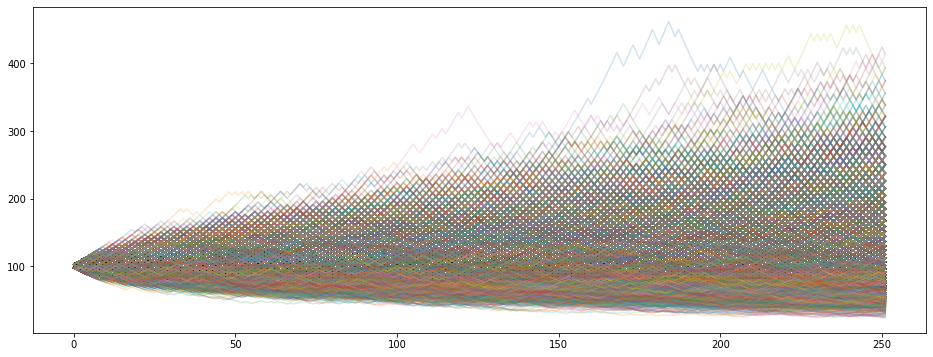

average price outcome after 1 year 114.61492162750316
price std after 1 year 48.39202533731117
average number of crossing the initial value 12.1528


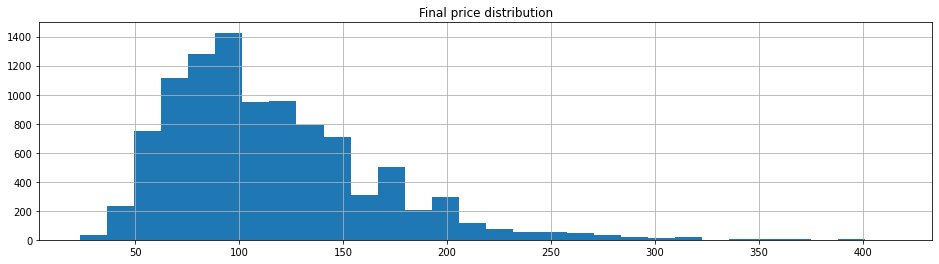

In [3]:
a = MonteCarlo_step_randomwalk_sim(n_step=252, 
                               n_trial=10000, #expected error = sqrt(10000) => +-1%
                               annualized_return=0.06, 
                               annualize_std=0.4, 
                               num_trading_days_per_year = 252,
                               initial_value = 100,
                               verbose = 1)
print('average price outcome after 1 year',a[:,-1].mean())
print('price std after 1 year',a[:,-1].std())

signchange = crossing_rate(simulated_result= a, 
                           reference_value=100#initial value
                          )
print('average number of crossing the initial value',np.sum(signchange, axis=1).mean())

plt.figure(figsize=(16,4))
plt.title("Final price distribution")
plt.hist(a[:,-1],30)
plt.grid()
plt.show()

Estimated value of the call option 25.58339920598183


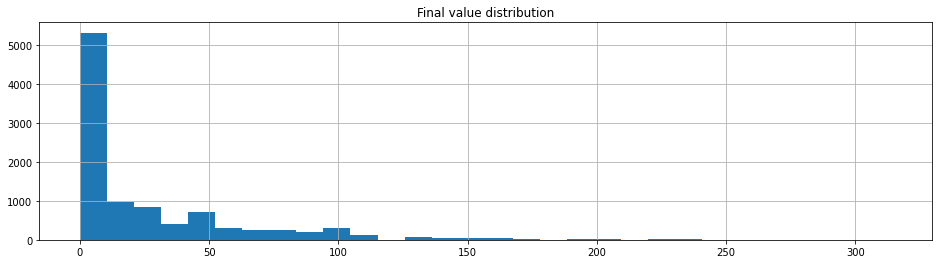

In [4]:
#for a 1-year European call option with strike price K=100
K = 100#strike price
final_value =a[:,-1] - K
final_value[final_value<0] = 0#We do not execise the option if its value is negative
print('Estimated value of the call option',final_value.mean())
plt.figure(figsize=(16,4))
plt.title("Final value distribution")
plt.hist(final_value,30)
plt.grid()
plt.show()

Estimated value of the call option 10.968477578478662


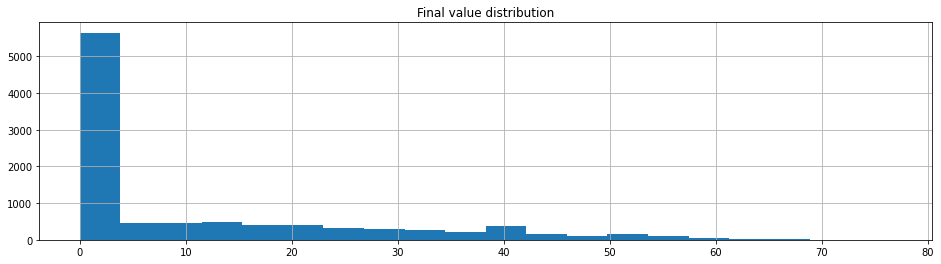

In [5]:
#for a 1-year European put option with strike price K=100
K = 100#strike price
final_value = K - a[:,-1]
final_value[final_value<0] = 0#We do not execise the option if its value is negative
print('Estimated value of the call option',final_value.mean())
plt.figure(figsize=(16,4))
plt.title("Final value distribution")
plt.hist(final_value,20)
plt.grid()
plt.show()